In [1]:
import numpy as np
from numpy import linalg 
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
data = load_svmlight_file("data.txt")
X,Y = data
X = X.toarray()

# Splitting the data

In [3]:
# Splitting the data into training, validation and testing set
train_X_whole, test_X_1, train_Y_whole, test_Y = train_test_split(X, Y, train_size=0.8, random_state=0)
train_X_1, valid_X_1, train_Y, valid_Y = train_test_split(train_X_whole, train_Y_whole, train_size=0.75, random_state=0)  


# The resulting training, validation and testing set ratio is 0.6 : 0.2 : 0.2  
print(len(train_X_1))
print(len(train_Y))
print(len(valid_X_1))
print(len(valid_Y))
print(len(test_X_1))
print(len(test_Y))


460
460
154
154
154
154


# Adding the bias term

In [4]:
# Add a column vector with all one at the first column of train_X, valid_X, and test_X
# so when creating the weight vector, the first term of weight w0 can act as the bias

train_X = np.c_[np.ones(len(train_X_1)), train_X_1]
valid_X = np.c_[np.ones(len(valid_X_1)), valid_X_1]
test_X = np.c_[np.ones(len(test_X_1)), test_X_1]


# Perceptron Model

In [5]:
# Implement the cost function
def cost_function(train_X, train_Y, weight):
    cost = 0
    update = 0
    for index, x_i in enumerate(train_X):                  # loop through all the sample 
        if train_Y[index] != np.sign(np.dot(x_i, weight)): # if the prediction is not equal to the label (i.e. mis-classified)
            cost += 1                                      # penalises 1 for every mis-classification
            update += train_Y[index]*x_i                   # summation of sub_gradient of all mis-classification
    return cost, update

    
    
# Training the model
def Training(train_X, train_Y, valid_X, valid_Y, weight, learning_rate, iteration):
    
    # initialise the parameters
    cost_list = []
    train_accuracy_list = []
    valid_accuracy_list = []
    weight_list = []
    index_max_acc = 0
    valid_accuracy_max = 0

    
    # Train on training data
    for i in range(iteration):
        
        # calculate the cost and summation of sub_gradients
        cost, update = cost_function(train_X, train_Y, weight)
        
        
        # store the cost in a list
        cost_list.append(cost)
        
        
        # calculate the training and validation accuracy from current weight
        train_current_accuracy = accuracy(train_Y, train_X, weight)
        valid_current_accuracy = accuracy(valid_Y, valid_X, weight)
        
        
        # store the training and validation acccracy in a list
        train_accuracy_list.append(train_current_accuracy)
        valid_accuracy_list.append(valid_current_accuracy)
                  
            
        # keep tracking the maximum validation accuracy
        if valid_current_accuracy > valid_accuracy_max:
            valid_accuracy_max = valid_current_accuracy
            index_max_acc = i

            
        # store the current weight in a list
        w = weight.copy()
        weight_list.append(w)
        
        
        # update the current weight
        weight += learning_rate * update  
            
            
    return index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list


           
# Make prediction from the weight
def prediction(X, weight): 
    y_pred = []
    for i in X:
        y_pred.append(np.sign(np.dot(i, weight)))
    return y_pred



# computing the accuracy 
def accuracy(Y, X, weight):
    return accuracy_score(Y, prediction(X, weight))





# Implement the model on Pima Indian Diabetes Dataset (General Analysis)

Training accuracy: 0.6934782608695652
Validation accuracy: 0.7467532467532467
Number of iteration for maxmium Validation accuracy: 343


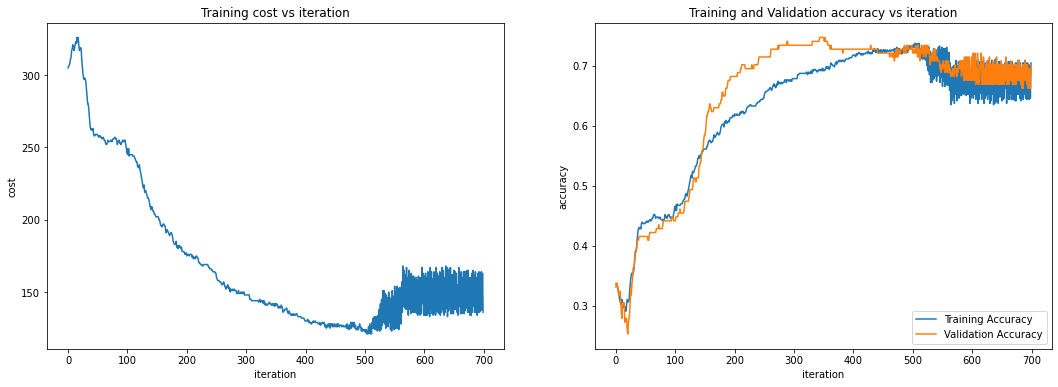

In [6]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


# Experimemt 1 (changing the inital weight)

### Random initial weight between 0 to 0.1 

Training accuracy: 0.7695652173913043
Validation accuracy: 0.7857142857142857
Number of iteration for maxmium Validation accuracy: 72


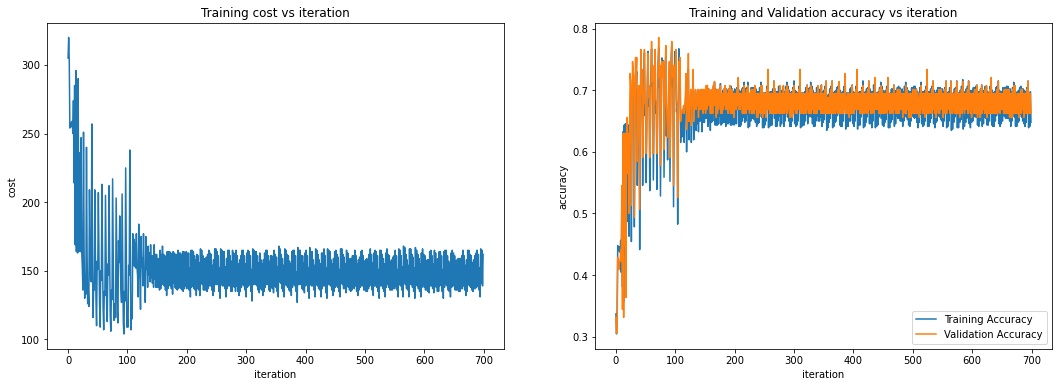

In [7]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


### Random initial weight between 0 to 1 

Training accuracy: 0.6934782608695652
Validation accuracy: 0.7467532467532467
Number of iteration for maxmium Validation accuracy: 343


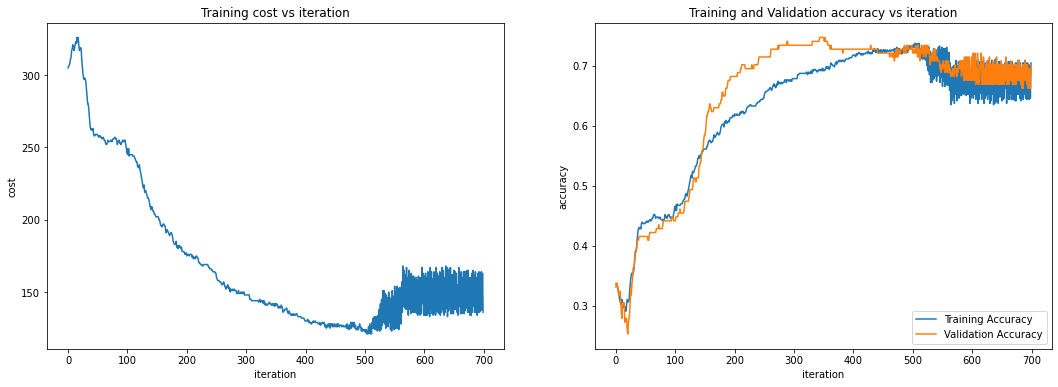

In [8]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


### Random initial weight between 1 to 2 

Training accuracy: 0.6630434782608695
Validation accuracy: 0.7337662337662337
Number of iteration for maxmium Validation accuracy: 634


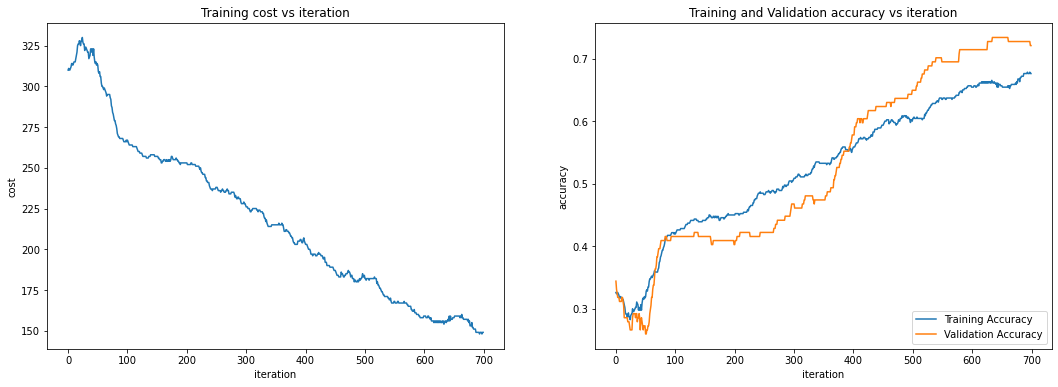

In [9]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=1, high=2, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


### Random initial weight between 5 to 6

Training accuracy: 0.4608695652173913
Validation accuracy: 0.42207792207792205
Number of iteration for maxmium Validation accuracy: 677


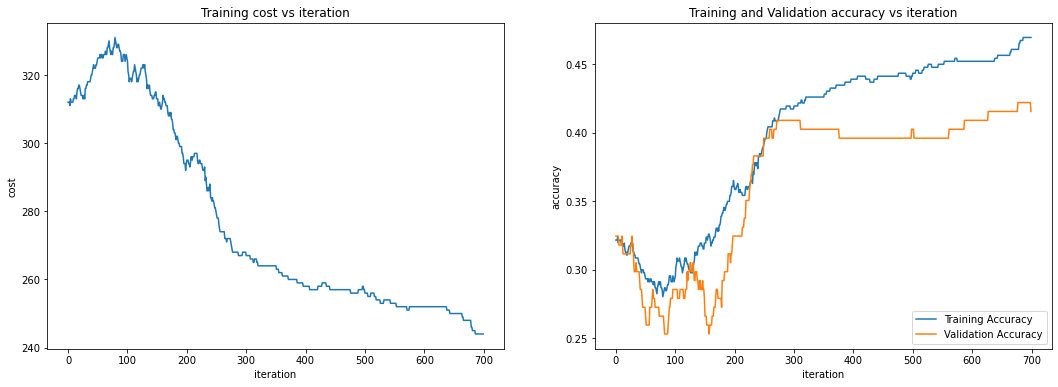

In [10]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=5, high=6, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


# Experimemt 2 (changing the learning rate)

### learning rate = 0.01

Training accuracy: 0.7434782608695653
Validation accuracy: 0.7792207792207793
Number of iteration for maxmium Validation accuracy: 84


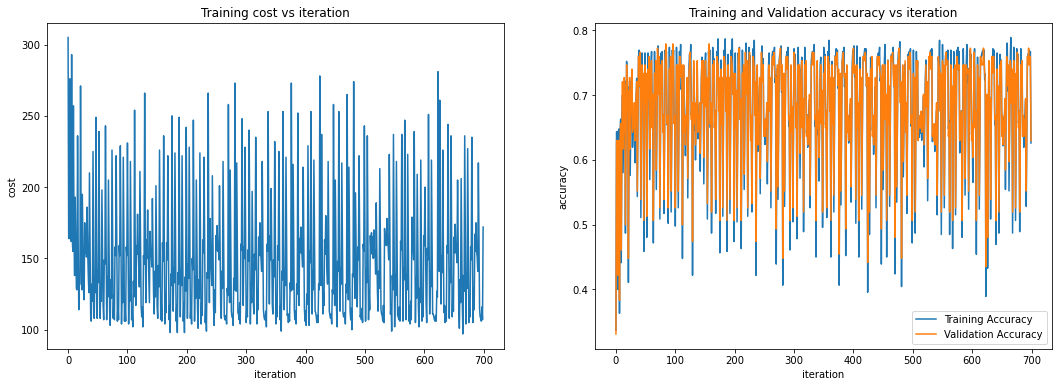

In [11]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 0.01, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


### learning rate = $1\times 10^{-4}$

Training accuracy: 0.7695652173913043
Validation accuracy: 0.7857142857142857
Number of iteration for maxmium Validation accuracy: 72


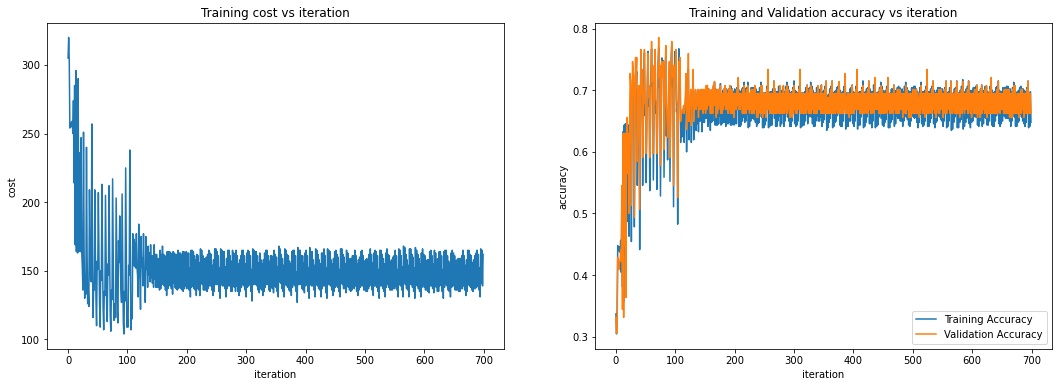

In [12]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


### learning rate = $1\times 10^{-6}$

Training accuracy: 0.44565217391304346
Validation accuracy: 0.42857142857142855
Number of iteration for maxmium Validation accuracy: 669


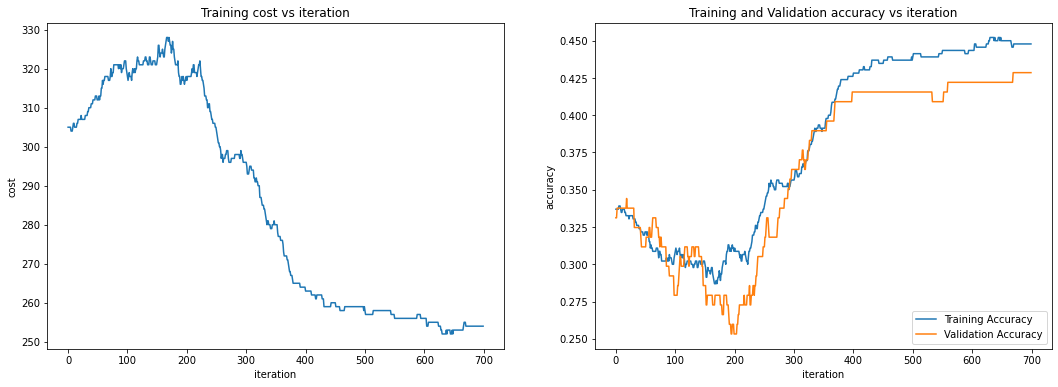

In [13]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-6, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


# Experimemt 3 (without bias)

Training accuracy: 0.758695652173913
Validation accuracy: 0.7727272727272727
Number of iteration for maxmium Validation accuracy: 36


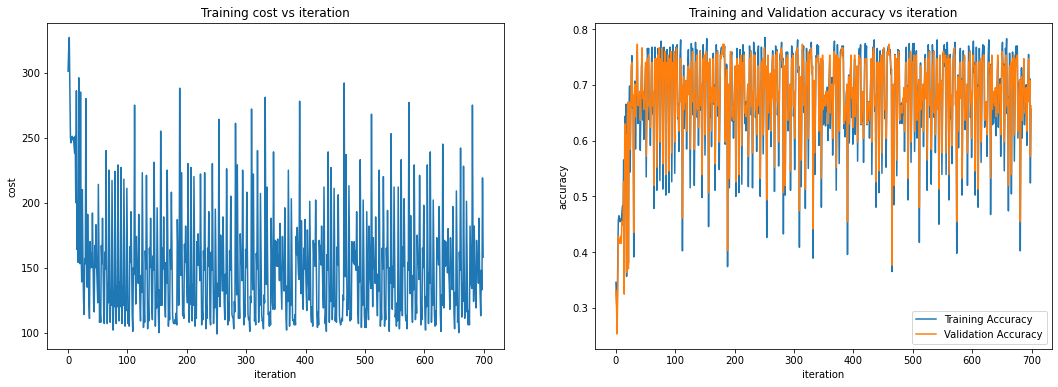

In [14]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X_1[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X_1, train_Y, valid_X_1, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


### With bias

Training accuracy: 0.7695652173913043
Validation accuracy: 0.7857142857142857
Number of iteration for maxmium Validation accuracy: 72


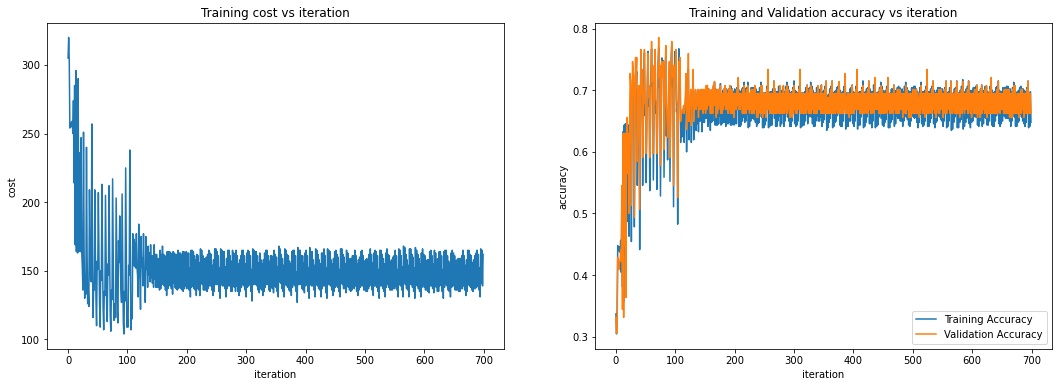

In [15]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the Training and Validation accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Number of iteration for maxmium Validation accuracy:', index_max_acc)

# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list)
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list)
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list)
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()


# Testing accuracy with the best random initial weight (between 0 to 0.1) with bias and the best learning rate ($1\times 10^{-4}$)

In [16]:
# The random initial weight between 0 to 0.1 with bias and the learning rate of 1×10−4 give us the best
# maximum validation accuracy. Therefore, we choose these parameters to compute the testing accuracy.


# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_X[0]),))


# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_X, train_Y, valid_X, valid_Y, weight_initial, 1e-4, 700)


# Computing the testing accuracy
print('Testing accuracy:' ,accuracy(test_Y, test_X, weight_list[index_max_acc]))

print()

# print the weight
print('Percetron best weight: ', weight_list[index_max_acc])




Testing accuracy: 0.8246753246753247

Percetron best weight:  [ 0.01988135 -0.00948107 -0.04429449  0.00828996  0.0017109   0.01229317
 -0.03295991 -0.00564489 -0.00358041]


# Test the model on artificially generated linearly separable data
### To confirm the functionality of the Perceptron Model, I created a linearly separable dataset verify the model.

(1000, 2) (1000, 1)


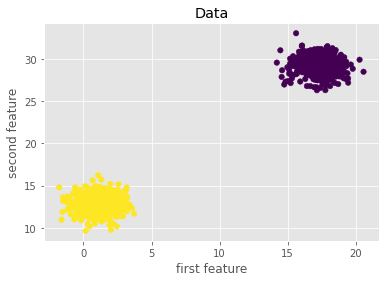

In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# generate a 1,000 data points for 2 classes, each data point has 2 features
(A, b) = make_blobs(n_samples=1000, n_features=2, centers=2, center_box=(1,40), cluster_std=1, random_state=1)
np.place(b, b==0, [-1])
b = b.reshape((b.shape[0], 1))

print(A.shape, b.shape)  # A is the 2-feature matrix and b is the label vector

# plot the classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.scatter(A[:, 0], A[:, 1], marker="o", c=b[:, 0], s=30)
plt.show()

In [18]:
# Splitting the data into training, validation and testing set
train_A_whole, test_A_1, train_b_whole, test_b = train_test_split(A, b, train_size=0.8, random_state=1)
train_A_1, valid_A_1, train_b, valid_b = train_test_split(train_A_whole, train_b_whole, train_size=0.75, random_state=1)  


# The resulting training, validation and testing set ratio is 0.6 : 0.2 : 0.2  
print(len(train_A_1))
print(len(train_b))
print(len(valid_A_1))
print(len(valid_b))
print(len(test_A_1))
print(len(test_b))


# Add a column vector with all one at the first column of train_A, valid_A, and test_A
# so when creating the weight vector, the first term of weight w0 can act as the bias

train_A = np.c_[np.ones(len(train_A_1)), train_A_1]
valid_A = np.c_[np.ones(len(valid_A_1)), valid_A_1]
test_A = np.c_[np.ones(len(test_A_1)), test_A_1]


600
600
200
200
200
200


# Use the Perceptron model to classify the linearly separable data

In [19]:
# initailize the weight 
np.random.seed(0)
weight_initial = np.random.uniform(low=0, high=0.1, size=(len(train_A[0]),))



# Execute the model
index_max_acc, cost_list, train_accuracy_list, valid_accuracy_list, weight_list = Training(train_A, train_b, valid_A, valid_b, weight_initial, 0.001, 10)

# Computing the Accuracy
print('Training accuracy:' ,train_accuracy_list[index_max_acc])
print('Validation accuracy:' ,valid_accuracy_list[index_max_acc])
print('Testing accuracy:' ,accuracy(test_b, test_A, weight_list[index_max_acc]))
print('weight: ', weight_list[index_max_acc])


Training accuracy: 1.0
Validation accuracy: 1.0
Testing accuracy: 1.0
weight:  [ 0.97388135 -8.13674851  2.64442784]


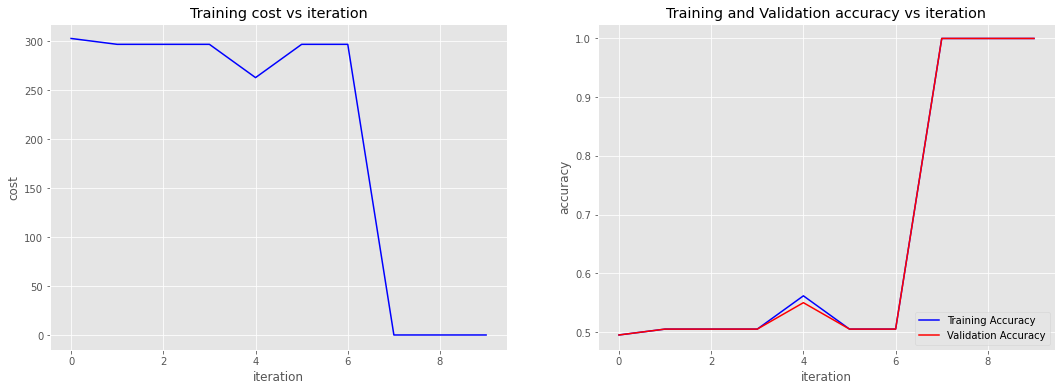

In [20]:
# plot cost vs iteration
fig, ax = plt.subplots(1,2,figsize=[18,6])

ax[0].plot([i for i in range(len(cost_list))], cost_list, color='blue')
ax[0].set_title('Training cost vs iteration')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('cost')

# plot training and validation accuracy vs iteration
ax[1].plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, color='blue')
ax[1].plot([i for i in range(len(valid_accuracy_list))], valid_accuracy_list, color='red')
ax[1].set_title('Training and Validation accuracy vs iteration')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'],loc='lower right')
plt.show()